Objective:
Program to train and evaluate a convolutional neural network using Keras Library to classify MNIST fashion dataset. Demonstrate the effect of filter size, regularization, batch size and optimization algorithm on model performance.


Description of the Model:

The model is designed for classifying images from the Fashion MNIST dataset, that contains 10 different clothing categories.

It consists of multiple convolutional layers. Multiple convolutional is used for automatic feature extraction.

Max-pooling layers help in reducing dimensionality while retaining important information.

Fully connected dense layers are used for classification.

The model learns spatial hierarchies of features to distinguish between different clothing items.

The final output layer uses the softmax activation function to predict class probabilities.

The architecture is flexible, allowing hyperparameter tuning to optimize performance.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7818 - loss: 0.6134 - val_accuracy: 0.8764 - val_loss: 0.3453
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8854 - loss: 0.3144 - val_accuracy: 0.8914 - val_loss: 0.3035
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9044 - loss: 0.2585 - val_accuracy: 0.8941 - val_loss: 0.2875
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9169 - loss: 0.2216 - val_accuracy: 0.8970 - val_loss: 0.2823
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9288 - loss: 0.1900 - val_accuracy: 0.9073 - val_loss: 0.2567
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9372 - loss: 0.1701 - val_accuracy: 0.9087 - val_loss: 0.2539
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9416 - loss: 0.1567 - val_accuracy: 0.9108 - val_loss: 0.2658
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9513 - loss: 0.1292 

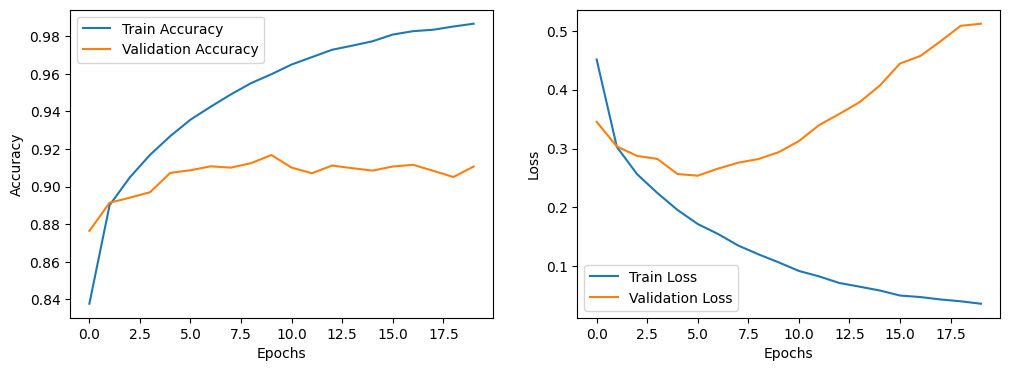

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


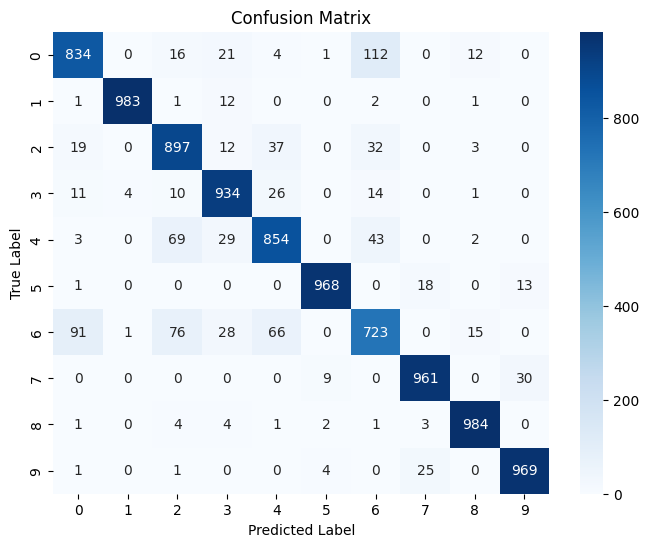

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

def load_data():
    (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    return (x_train, y_train), (x_test, y_test)

def create_model(filter_size=32, kernel_size=(3,3), reg=None, optimizer='adam'):
    model = keras.Sequential([
        layers.Conv2D(filter_size, kernel_size, activation='relu', input_shape=(28,28,1), kernel_regularizer=reg),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filter_size * 2, kernel_size, activation='relu', kernel_regularizer=reg),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=reg),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate(filter_size=32, kernel_size=(3,3), reg=None, batch_size=32, optimizer='adam', epochs=20):
    (x_train, y_train), (x_test, y_test) = load_data()
    model = create_model(filter_size, kernel_size, reg, optimizer)
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
    return model, history, (x_test, y_test)

def plot_performance(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_confusion_matrix(model, x_test, y_test):
    y_pred = np.argmax(model.predict(x_test), axis=1)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


model1, history1, (x_test1, y_test1) = train_and_evaluate(filter_size=32, kernel_size=(3,3), reg=None, batch_size=32, optimizer='adam', epochs=20)
plot_performance(history1)
plot_confusion_matrix(model1, x_test1, y_test1)



Code Explanation:

1. **Importing Libraries:**

   - TensorFlow and Keras for deep learning model implementation.
   - Matplotlib and Seaborn for visualization.
   - NumPy for array operations.
   - Sklearn's confusion matrix for evaluating classification performance.

2. **Loading and Preprocessing Data:**

   - The `load_data()` function loads Fashion MNIST data.
   - Data is normalized to a scale of 0-1 by dividing pixel values by 255.
   - The images are reshaped to `(28,28,1)` to be compatible with CNN input requirements.

3. **Creating the CNN Model:**

    The `create_model()` function defines a CNN with:
     - Two convolutional layers (`Conv2D`) for extracting features.
     - Two max-pooling layers (`MaxPooling2D`) to reduce dimensionality.
     - A fully connected dense layer of 128 neurons with ReLU activation.
     - A final dense layer with 10 output neurons (one for each class) using softmax activation.
     - Optional L2 regularization and different optimizers.

4. **Training and Evaluating the Model:**

   - The `train_and_evaluate()` function trains the model using:
     - `batch_size=32`, `epochs=20` by default.
     - Uses validation data to track performance.
   - Returns the trained model and history.

5. **Plotting Performance Metrics:**

   - `plot_performance()` function visualizes training and validation accuracy/loss.
   - `plot_confusion_matrix()` function generates a confusion matrix heatmap for classification analysis.

6. **Running the Model:**

   - The script initializes and trains the model.
   - Performance metrics are plotted to analyze the impact of training.




My Comments:

The model performance is well , but due to training loss decreases when validation loss increases , overfitting might concern.

In this model the regularization techniques like dropout or L2  regulariztion can help .

In this model i done experiment with different optimizers like Stochastic Gradient Descent (SGD) , Root Mean Square Propagation (RMSprop) which might improve generalization .

Hyperparameter tuning (filter sizes, batch size) could further optimize performance.

When i run this model till 20 epoch i notice that when number of epoch increases the accuracy of model is also increased . In first epoch accuracyis 0.7818 but at last the accuracy is  0.9888 .